In [ ]:
!pip install python-Levenshtein
!pip install gensim===3.6.0
!pip install beautifulsoup4 lxml
!pip install ebooklib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 59.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.6.0-cp312-cp312-linux_x86_64.whl size=23429701 sha256=5382c1c4b8ed563cf48c23d6b8b8feb0ecb11b2c31e395ae9773af8b9e89a81f
  Stored in directory: /root/.cache/pip/wheels/36/85/0c/382ef8ed2cc6456cb568447e126e39cd11f6aff4c5a93eeb47
Successfully built gensim
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip install transformers

In [ ]:
pip install sumy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 70.3 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21695 sha256=1d06cf719fefe340460bafe4d3938185bfa9121807faa2b73cfdd0300b7a63d1
  Stored in directory: /root/.cache/pip/wheels/32/99/64/59305409cacd03aa03e7bddf31a9db34b1fa7033bd41972662
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=a175b754b2700530a42764647e44d0dee32a2d2da88546eed2e526fb786c18a5
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built breadability docopt


In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

In [ ]:
pip install requests beautifulsoup4 lxml ebooklib sumy

In [ ]:
import requests
from urllib.parse import urlparse
from bs4 import BeautifulSoup
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
import ebooklib
from ebooklib import epub

In [ ]:
def f(seq):
    seen = set()
    return [x for x in seq if x not in seen and not seen.add(x)]
# the below summary percentages can be adjusted at will
def summary(x):
    num_sentences = len(split_sentences(x))

    if num_sentences > 100:
        perc = 0.05
    elif num_sentences > 50:
        perc = 0.1
    elif num_sentences > 10:
        perc = 0.2
    else:
        return x

    test_summary = summarize(x, ratio=perc, split=True)
    test_summary = '\n'.join(map(str, f(test_summary)))

    return test_summary

def get_text_from_url(url):
    response = requests.get(url)
    response.encoding = 'utf-8'

    soup = BeautifulSoup(response.text, 'lxml')

    # Removing script and style elements
    for script in soup(["script", "style"]):
        script.decompose()

    # Extracting the main text content
    text = ' '.join(soup.stripped_strings)
    return text

def get_text_from_epub(file_path):
    book = epub.read_epub(file_path)
    text = []

    for item in book.get_items_of_type(ebooklib.ITEM_DOCUMENT):
        content = item.get_content().decode('utf-8')
        soup = BeautifulSoup(content, 'html.parser')
        text.append(' '.join(soup.stripped_strings))

    return "\n".join(text)

def get_text(file_or_url):
    if urlparse(file_or_url).scheme in ('http', 'https'):
        return get_text_from_url(file_or_url)
    elif file_or_url.lower().endswith('.epub'):
        return get_text_from_epub(file_or_url)
    else:
        with open(file_or_url, 'r') as f:
            return f.read()

def word_count(text):
    return len(text.split())

# for large texts content is split into chunks to ease the burdain on CPU requirenments
def split_text_into_chunks(text, max_chunk_size):
    words = text.split()
    chunks = []
    current_chunk = []

    for word in words:
        current_chunk.append(word)
        if len(' '.join(current_chunk)) >= max_chunk_size:
            chunks.append(' '.join(current_chunk))
            current_chunk = []

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving hemingway-old-man-and-the-sea.epub to hemingway-old-man-and-the-sea.epub


In [ ]:
# Get the filename
file_or_url = list(uploaded.keys())[0]
print(f"Uploaded file: {file_or_url}")

# Extract text
mytxt = get_text(file_or_url)

# Character count
num_characters = len(mytxt)
print(f"Number of characters in the original text: {num_characters}")

Uploaded file: hemingway-old-man-and-the-sea.epub
Number of characters in the original text: 134636


In [ ]:
if file_or_url.lower().endswith('.epub') or not urlparse(file_or_url).scheme in ('http', 'https'):
    mytxt_chunks = split_text_into_chunks(mytxt, max_chunk_size=int(0.4 * num_characters)) #adjust max chunk size based on number of characters
else:
    mytxt_chunks = [mytxt]

print(f"Number of chunks created: {len(mytxt_chunks)}")

Number of chunks created: 3


In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

def summary(text, num_sentences=None):
    # Estimate number of sentences if not given
    sentences = text.split('. ')
    if not num_sentences:
        if len(sentences) > 100:
            num_sentences = max(int(len(sentences) * 0.05), 1)
        elif len(sentences) > 50:
            num_sentences = max(int(len(sentences) * 0.1), 1)
        elif len(sentences) > 10:
            num_sentences = max(int(len(sentences) * 0.2), 1)
        else:
            return text

    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary_sentences = summarizer(parser.document, num_sentences)

    # Remove duplicates
    seen = set()
    summary_sentences = [str(s) for s in summary_sentences if s not in seen and not seen.add(s)]

    return '\n'.join(summary_sentences)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk

# Download the correct tokenizer that Sumy expects
nltk.download('punkt')
nltk.download('punkt_tab')  # This is the key for Sumy to work

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Summarize each chunk and join the summaries
mysummary = "\n\n".join(summary(chunk) for chunk in mytxt_chunks)

print("Summary:")
print(mysummary)

# Word Count
original_word_count = word_count(mytxt)
summary_word_count = word_count(mysummary)

print('\nWord Count:')
print(f"Original: {original_word_count}")
print(f"Summary: {summary_word_count}")

Summary:
"But remember how you went eighty–seven days without fish and then we caught big ones every day for three weeks."
"But you went turtle–ing for years off the Mosquito Coast and your eyes are good."
There was no cast net and the boy remembered when they had sold it.
"How would you like to see me bring one in that dressed out over a thousand pounds?"
"Then live a long time and take care of yourself," the old man said.
But then I think of Dick Sisler and those great drives in the old park."
"If Durocher had continued to come here each year your father would think him the greatest manager."
He rolled his trousers up to make a pillow, putting the newspaper inside them.
They had coffee from condensed milk cans at an early morning place that served fishermen.
He was very fond of flying fish as they were his principal friends on the ocean.
Some of the younger fishermen, those who used buoys as floats for their lines and had motorboats, bought when the shark livers had brought much mone

In [ ]:
# Save the summary to a text file
with open("summary_output.txt", "w") as output_file:
    output_file.write("Summary:\n")
    output_file.write(mysummary)
    output_file.write("\n\nWord Count:\n")
    output_file.write(f"Original: {original_word_count}\n")
    output_file.write(f"Summary: {summary_word_count}\n")

In [ ]:
from google.colab import files

files.download("summary_output.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install rake-nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from rake_nltk import Rake

In [ ]:
r = Rake()

# Extract keywords
r.extract_keywords_from_text(mysummary)
keywords = r.get_ranked_phrases()

print("Top 20 Keywords/Phrases:")
for phrase in keywords[:20]:
    print("-", phrase)

Top 20 Keywords/Phrases:
- went eighty – seven days without fish
- thoughts aloud many times since
- projecting green sticks dip sharply
- caught big ones every day
- two forty – fathom coils
- old man could hardly breathe
- went turtle – ing
- high dorsal fin knifing
- two hundred fathoms high
- green – sapped stick
- agua mala came quickly
- back – swept wings
- long black wings circling
- daylight something took one
- – war bird
- three hundred fathoms
- old man always thought
- water without wavering
- thousand pounds ?"
- somewhat less intolerable


In [ ]:
with open("keywords.txt", "w") as f:
    for phrase in keywords:
        f.write(phrase + "\n")

In [ ]:
from google.colab import files

files.download("keywords.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from collections import Counter
import re
from textblob import TextBlob
!pip install textblob

In [ ]:
# Clean text and split words
words = re.findall(r'\b\w+\b', mysummary.lower())  # Lowercase, simple tokenization
word_freq = Counter(words)

# Most common words (excluding common stopwords)
stopwords = set(["the","and","to","of","in","a","is","it","for","on","with","as","that","this","he","she","his","her","they","was","at"])
common_words = [(word, count) for word, count in word_freq.most_common(50) if word not in stopwords]

print("Top 20 Words (excluding stopwords):")
for word, count in common_words[:20]:
    print(f"{word}: {count}")

# Sentiment
blob = TextBlob(mysummary)
print("\nSentiment Analysis:")
print(f"Polarity: {blob.sentiment.polarity}")  # -1 negative, 1 positive
print(f"Subjectivity: {blob.sentiment.subjectivity}")  # 0 objective, 1 subjective

# Approximate reading stats
num_sentences = len(re.split(r'[.!?]', mysummary))
num_words = len(words)
print("\nReading Stats:")
print(f"Number of sentences: {num_sentences}")
print(f"Number of words: {num_words}")
print(f"Average words per sentence: {num_words / num_sentences:.2f}")

Top 20 Words (excluding stopwords):
i: 24
fish: 21
now: 16
but: 15
had: 14
man: 14
would: 12
if: 12
him: 12
could: 12
old: 11
so: 10
there: 9
said: 9
not: 9
be: 9
have: 9
then: 8
one: 8
were: 8

Sentiment Analysis:
Polarity: 0.11661648688288033
Subjectivity: 0.4718972807702317

Reading Stats:
Number of sentences: 81
Number of words: 1395
Average words per sentence: 17.22


In [ ]:
import re

sentences = re.split(r'(?<=[.!?])\s+', mysummary)

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

sentence_embeddings = model.encode(sentences, convert_to_tensor=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def semantic_answer(question, sentences, sentence_embeddings, top_n=3):
    question_embedding = model.encode(question, convert_to_tensor=True)
    scores = util.cos_sim(question_embedding, sentence_embeddings)[0]
    top_indices = scores.topk(k=top_n).indices
    return "\n".join([sentences[i] for i in top_indices])

In [ ]:
question = "How does the old man catch fish?"
print(semantic_answer(question, sentences, sentence_embeddings))

He cut a piece of line and tied the fish's lower jaw against his bill so his mouth would not open and they would sail as cleanly as possible.
How did I let the fish cut me with that one quick pull he made?
He kept them straighter than anyone did, so that at each level in the darkness of the stream there would be a bait waiting exactly where he wished it to be for any fish that swam there.


In [ ]:
!pip install wordcloud matplotlib


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

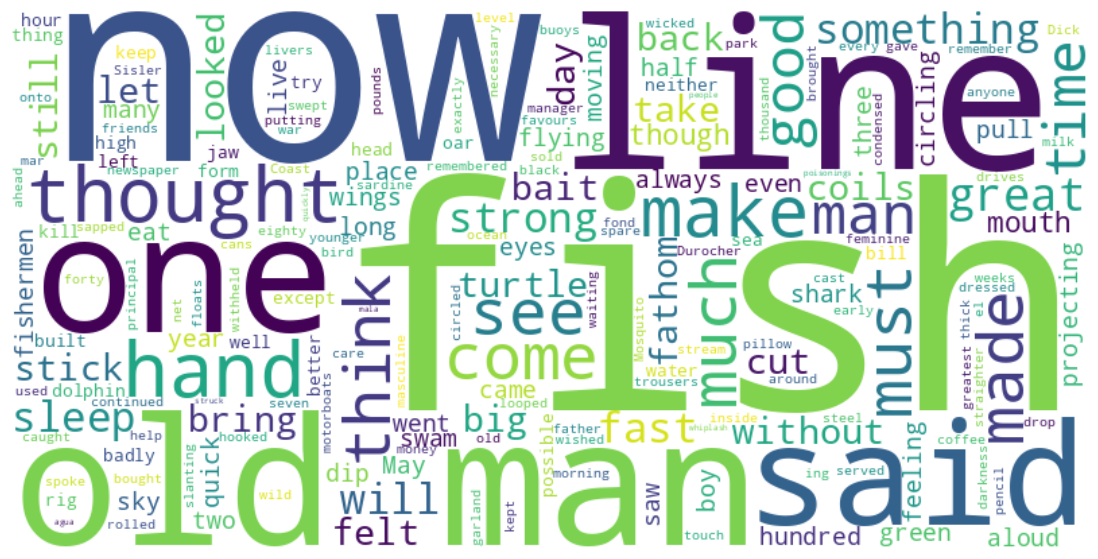

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white').generate(mysummary)

plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()